In [1]:
from TrafficGraph import TrafficGraph
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time

%matplotlib inline
mpl.rcParams['figure.figsize'] = (10, 6)

# Plot jam factor against velocity proportion

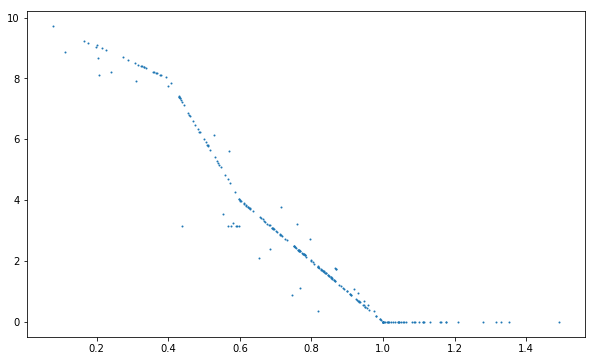

In [17]:
vvmax = []
jam_factor = []

for file in list_files():
    data = load_data(file)
    vvmax.extend(data["actual_speed"]/data["freeflow_speed"])
    jam_factor.extend(data["jam_factor"])

paired_data = np.array([vvmax, jam_factor]).T
np.random.shuffle(paired_data)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(paired_data[0:250,0], paired_data[0:250,1], s = 1)
plt.show()

# Plot network utilization

In [2]:
print(list_files("Monday", 0))

['Monday/2018-05-28T00.00/2018-05-27T23.59.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.02.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.05.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.08.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.11.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.14.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.17.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.20.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.23.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.26.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.29.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.32.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.35.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.38.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.41.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.44.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.47.04.000.txt', 'Monday/2018-05-28T00.00/2018-05-28T00.50.04.000.txt', 'Monday/2

In [8]:
times = []
network_utilization = []
file_counter = 0
curr_time = time.clock()
for file in list_files("Monday", 1):
    g = TrafficGraph(file)
    total_ffvelocity_length = 0
    total_velocity_length = 0
    times.append(g.timestamp)
    for e in g.edges():
        total_ffvelocity_length = total_ffvelocity_length + g.freeflow_speed[e]*g.length[e]
        total_velocity_length = total_velocity_length + g.actual_speed[e]*g.length[e]
    network_utilization.append(total_velocity_length/total_ffvelocity_length)
    next_time = time.clock()
    print("Time elapsed: " + str(next_time-curr_time))
    curr_time = next_time
    print(network_utilization[-1])

Time elapsed: 38.6875
0.9685561800653135
Time elapsed: 38.546875
0.9836316633742624
Time elapsed: 38.40625
0.9863690920567679
Time elapsed: 38.625
0.9982279285320695
Time elapsed: 38.671875
0.997661208528727
Time elapsed: 38.65625
0.9984938578615331
Time elapsed: 39.15625
0.9911917206911556
Time elapsed: 39.609375
0.9906194737401903
Time elapsed: 39.34375
1.0021204892679054
Time elapsed: 38.96875
1.0057283999733648
Time elapsed: 38.578125
1.0051321621568299
Time elapsed: 38.71875
1.0012371803244693
Time elapsed: 39.046875
1.0020194268296105
Time elapsed: 38.953125
1.0074579188356991
Time elapsed: 38.546875
1.0082109043106116
Time elapsed: 38.546875
1.0116699298075218
Time elapsed: 39.03125
1.0151116897069874
Time elapsed: 39.21875
1.022263119732542
Time elapsed: 39.09375
1.0218500293087196
Time elapsed: 39.046875
1.026055718528504


AttributeError: module 'matplotlib.dates' has no attribute 'MinutesLocator'

In [20]:
print(network_utilization)
times = [path_to_time(file) for file in list_files("Monday", 0)]

[0.9685561800653135, 0.9836316633742624, 0.9863690920567679, 0.9982279285320695, 0.997661208528727, 0.9984938578615331, 0.9911917206911556, 0.9906194737401903, 1.0021204892679054, 1.0057283999733648, 1.0051321621568299, 1.0012371803244693, 1.0020194268296105, 1.0074579188356991, 1.0082109043106116, 1.0116699298075218, 1.0151116897069874, 1.022263119732542, 1.0218500293087196, 1.026055718528504]


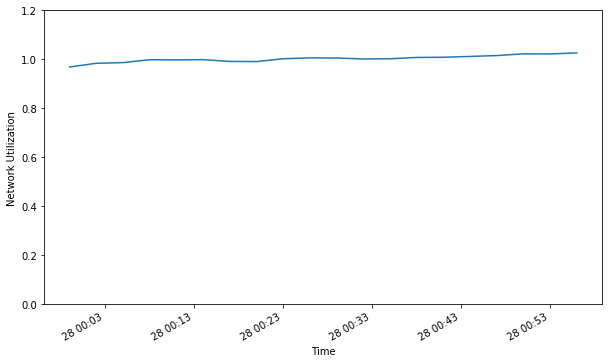

In [21]:
hours = mpl.dates.HourLocator()
minutes = mpl.dates.MinuteLocator()
fig2, ax2 = plt.subplots()
ax2.plot(times, network_utilization)
ax2.set_xlabel("Time")
ax2.set_ylabel("Network Utilization")
ax2.set_ylim(0, 1.2)
fig2.autofmt_xdate()

In [ ]:
keys = {"Monday":0, "Wednesday":1, "Thursday":2, "Sunday":3}
graphs = [[],[],[],[]]
f = open("graph_load.log", "w+")
curr_time = time.clock()
counter = 0
for key in keys:
    for tr in range(0,4):
        for file in list_files(key, tr):
            graphs[keys[key]].append(TrafficGraph(file))
            next_time = time.clock()
            f.write("Time elapsed: " + str(next_time-curr_time) + "\n")
            if counter%100 == 0:
                print("Time elapsed: " + str(next_time-curr_time))
                print(file)
            curr_time = next_time
            counter = counter + 1
f.close()

Time elapsed: 37.90625
Monday/2018-05-28T00.00/2018-05-27T23.59.04.000.txt
